<a href="https://colab.research.google.com/github/Matthew0077/genai/blob/main/61201032e_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1+1 #shife enter 比較帥

2



## Python讀取標準套件

In [ ]:
%matplotlib inline

import numpy as np #numpy就是算數學
import pandas as pd #python裡的excel
import matplotlib.pyplot as plt #matplotlib.pyplot就是畫圖，like圖表
import seaborn as sns #進階視覺化工具(chatgpt找的)，就是基於matplotlib.pyplo的視覺化工具
#as後的是縮寫


這個是外加的

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### 老師教的

畫$f(x) = \sin(x)$

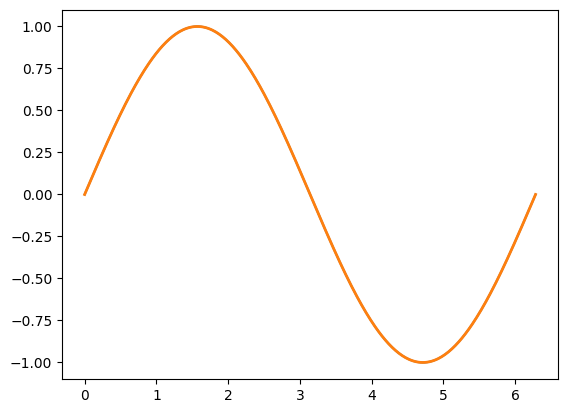

In [ ]:
x = np.linspace(0, 2 * np.pi, 400)
#0-2π 描400個點
#第一個數字是從哪開始，如果是0就是從0開始，1就是從1，有試過2
#好像是sin(x)沒辦法=2，所以會從1開始
#第二個數字是波段最高&最低值有幾個?sin(x)=1or-1
#數字seting是1就是只有一個最高值，2就是有1and-1，4就是有兩次最高值(+1)&最低值(-1)
y = np.sin(x)
plt.plot(x, y)
plt.plot(x,y,linewidth=2)
#linewidth線加粗

#下面都不用寫(筆記)
#plt.plot(x, y) #plot X&Y的點
#plt.xlabel("x") #x軸的命名
#plt.ylabel("sin(x)") #y軸的命名
#plt.title("Plot of y = sin(x)") #title 的命名
#plt.grid(True) #格線
#plt.show() #他寫顯示圖形，但不用也可以顯示

# 作業
希望可以把我的愛給老師，跳動的效果，上面的是生成的愛心，我是根據愛心去改寫用成跳動的，下面都有備註，我不想再移上來了。QQ

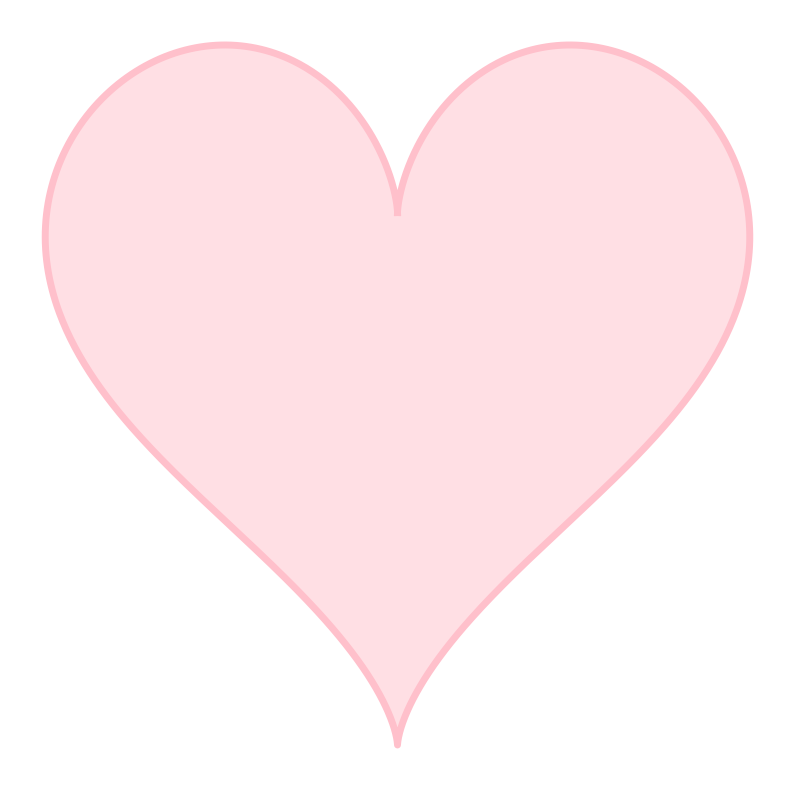

In [ ]:
def plot_heart(size=1, color='red'):
  #def 是定義函數
  #plot_heart函數名字，可以是87
  # size預設為1，沒指定顏色，就會畫紅色
    t = np.linspace(0, 2 * np.pi, 1000) # 0-2π, 描1000個點

    x = size * 16 * np.sin(t)**3
    y = size * (13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t))
    #數學公式(google出來的)
    #出處https://buzzorange.com/techorange/2018/08/20/science-student-knows-love-too/

    plt.figure(figsize=(10,10))
    # 畫布大小figsize ,if figsize的數不是一樣
    #加上plt.axis('equal') 可以確保圖案比例正確
    plt.plot(x, y, color=color, linewidth=5)
    #linewidth 是線的粗度
    plt.fill(x, y, color=color, alpha=0.5)
    #plt.fill 內部填滿顏色
    #alpha 是愛心的顏色透明度，最大是1
    plt.axis('off')    # 關閉坐標軸

plot_heart(color='pink') #這個要放到外面，不然跑不出來
#我問了chatgpt因為放到外面，它只在函數定義之後執行一次



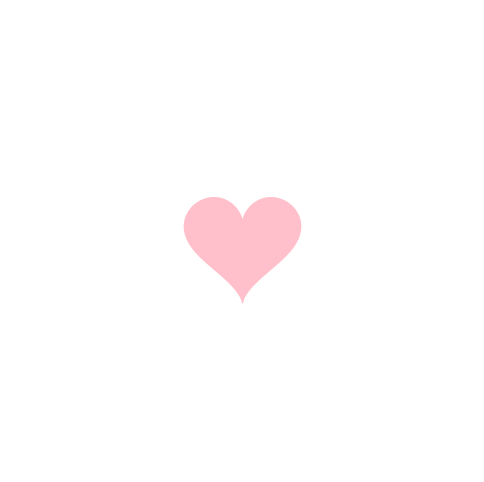

In [ ]:
def animate_heart(frames=60, color='pink'):
    fig, ax = plt.subplots(figsize=(6,6))
    line, = ax.plot([], [], color=color)
    fill = ax.fill([], [], color=color, alpha=1)[0]
    #[],[]一開始時 X 和 Y 座標都是空的，不會顯示東西
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.axis('equal')
    ax.axis('off') # 關閉坐標軸
#設定 X Y 軸範圍，讓愛心不會超出畫布，這樣愛心都會在畫布內

    t = np.linspace(0, 2 * np.pi, 1000)
    x_base = 16 * np.sin(t)**3
    y_base = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
#數學公式

    def init(): #動畫的初始化函數
        line.set_data([], []) #	清空線條，讓動畫從空白開始
        fill.set_xy(np.column_stack([[], []])) # 清空填充區域，確保不報錯
        return line, fill # 讓 Matplotlib 知道哪些物件要更新

    def update(frame):
        scale = 0.5 + 0.2 * np.sin(6 * np.pi * frame / frames)  # 讓愛心有跳動效果
        # 括號的數字是控心跳速度
        # scale = 0.7 時，愛心放大（變大）
        # scale = 0.3 時，愛心縮小（變小）
        x = scale * x_base
        y = scale * y_base
        # XY 座標整體放大或縮小
        fill.set_xy(np.column_stack([x, y]))
        # 這個句我是不懂的，我問朋友的要怎寫的，這個位置是更新愛心的填充區域
        return line, fill

    ani = FuncAnimation(fig, update, frames=frames, init_func=init, interval=16.6, blit=True)
    return ani
    # frames=frames，上面寫了frames=60，表示動畫會有 60 格
    # interval每幀的間隔時間 16.6ms，mean around 60fps ，1000/16.6ms = 60 frame/s

ani = animate_heart(frames=120, color='pink')
# frames動畫有 120 幀（完整跳動週期）
HTML(ani.to_jshtml())
#把動畫轉成 HTML5 格式，可以在瀏覽器播放